# 문제: 자연 풍경 이미지 분류하기
- seg_pred 폴더에는 분류가 되어 있지 않은 파일들이 있다
- 각각의 파일을 읽고, 예측하여 “seg_new” 라는 폴더를 만들어 예측된 분류명을 파일명으 로 하여 이미지를 생성하시오 (예: glacier_001.jpg)
- 생성된 파일의 이미지와 파일명을 눈으로 보고 올바르게 분류되었는지 보시오 (정확도 계산은 없음)


In [1]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np

In [4]:
foldername = '/Users/jsha/gjai/nlp/pytest_img/seg_pred/'

file_names = [os.path.join(foldername, name) for name in os.listdir(foldername)]
file_names[0]

'/Users/jsha/gjai/nlp/pytest_img/seg_pred/63.jpg'

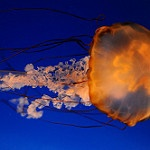

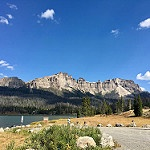

In [7]:
for i in range(0, 2):
    display(_Imgdis(filename=file_names[i], 
                                         width=120, height=120))

In [9]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(file_names[0])
print('Original:', type(img))

img_array = img_to_array(img)

print("NumPy array info:")
print(type(img_array))
print("type:", img_array.dtype)
print('shape:', img_array.shape)

Original: <class 'PIL.JpegImagePlugin.JpegImageFile'>
NumPy array info:
<class 'numpy.ndarray'>
type: float32
shape: (150, 150, 3)


In [10]:
img = load_img(file_names[-1])
print('Original:', type(img))

img_array = img_to_array(img)

print("NumPy array info:")
print(type(img_array))
print("type:", img_array.dtype)
print('shape:', img_array.shape)

Original: <class 'PIL.JpegImagePlugin.JpegImageFile'>
NumPy array info:
<class 'numpy.ndarray'>
type: float32
shape: (150, 150, 3)


In [11]:
image_height = 150
image_width = 150
channels = 3

dataset = np.ndarray(shape=(len(file_names), image_height,
                           image_width, channels), dtype=np.int32)
print(dataset.shape)

(7301, 150, 150, 3)


In [12]:
import cv2

for count, item in enumerate(file_names):
    img_cv = load_img(item)
    img_array_cv = img_to_array(img_cv)
    img_array_cv = cv2.resize(img_array_cv, (image_height,image_width))
    dataset[count] = img_array_cv    
    if count % 3000 == 0:
        print("%d images to array" % count)
        
print('All images to array!')

0 images to array
3000 images to array
6000 images to array
All images to array!


In [13]:
print(dataset.shape)

(7301, 150, 150, 3)


In [14]:
np.set_printoptions(linewidth=np.inf)
print(dataset[4000, :, :, 0])

[[255 252 249 ...  32  32  32]
 [255 255 255 ...  33  32  32]
 [127 139 145 ...  32  32  32]
 ...
 [ 18   3   0 ... 110 109 107]
 [ 72  38  26 ...  90  89  86]
 [ 92  72  91 ... 106 106 105]]


In [1]:
# train_images = train_images.reshape((len(train_images), 28, 28, 3))
pred_images = dataset.astype('float32') / 255


NameError: name 'dataset' is not defined

In [ ]:
from keras.models import load_model
import os

save_path = '/Users/jsha/gjai/nlp/19_practice/'
model_name = 'seg.h5'

loaded_model = load_model(save_path+model_name)

pred_eval = loaded_model.predict(pred_images)

print('prediction model loss & acc', pred_eval)